In [1]:
from matplotlib import pyplot as plt
from math import sin, cos, exp, log, fabs
from settings import q_x, k_x, v_x, mu0, mu1, f_x, l, n, analytic
h = l / n

In [2]:
def tridiagonal(diag_a, diag_b, diag_c, function):
    n = len(diag_a)
    y = [0] * n
    
    c, d = [], []

    c.append(diag_c[0] / diag_b[0])
    d.append(function[0] / diag_b[0])

    for i in range(1, n):
        c.append(diag_c[i] / (diag_b[i] - diag_a[i] * c[i - 1]))
        d.append((-diag_a[i] * d[i - 1] + function[i]) / (diag_b[i] - diag_a[i] * c[i - 1]))

    y[-1] = d[-1]

    for i in reversed(range(n - 1)):
        y[i] = -c[i] * y[i + 1] + d[i]

    return y


In [3]:
print(l)

2


In [4]:
def f_function(x):
    return eval(str(f_x))


def k_function(x):
    return eval(str(k_x))


def v_function(x):
    return eval(str(v_x))


def q_function(x):
    return eval(str(q_x))


def execute_analytic_function(x):
    return eval(str(analytic))

In [5]:

def build_first_matrix(n, h, x):
    diag_a = [0]
    diag_b = [1]
    diag_c = [0]

    for i in range(1, n - 1):
        diag_a.append(v_function(x[i]) / (2 * h) - k_function(x[i] - h / 2) / (h ** 2))
        diag_b.append(q_function(x[i]) + (k_function(x[i] - h / 2) + k_function(x[i] + h / 2)) / (h ** 2))
        diag_c.append(-v_function(x[i] / (2 * h)) - (k_function(x[i] + h / 2)) / (h ** 2))

    diag_a.append(0)
    diag_b.append(1)
    diag_c.append(0)

    f = [f_function(x[i]) for i in range(1, n - 1)]
    f.insert(0, mu0)
    f.append(mu1)

    return diag_a, diag_b, diag_c, f


def build_second_matrix(n, h, x):
    diag_a = [0]
    diag_b = [1]
    diag_c = [0]

    v_minus = [0.5 * (v_function(x[i]) - fabs(v_function(x[i]))) for i in range(len(x))]
    v_plus = [0.5 * (v_function(x[i]) + fabs(v_function(x[i]))) for i in range(len(x))]

    k_minus = [k_function(x[i] - h / 2) for i in range(len(x))]
    k_plus = [k_function(x[i] + h / 2) for i in range(len(x))]

    for i in range(1, n - 1):
        diag_a.append(k_minus[i] / h ** 2 - v_minus[i] * k_minus[i] / (k_function(x[i]) * h))
        diag_b.append(-(k_minus[i] + k_plus[i]) / h ** 2 + v_minus[i] * k_minus[i] / (k_function(x[i]) * h) -
                          v_plus[i] * k_plus[i] / (k_function(x[i]) * h) - q_function(x[i]))
        diag_c.append(k_plus[i] / h ** 2 + v_plus[i] * k_plus[i] / (k_function(x[i]) * h))

    diag_a.append(0)
    diag_b.append(1)
    diag_c.append(0)

    f = [-f_function(x[i]) for i in range(1, n - 1)]
    f.insert(0, mu0)
    f.append(mu1)

    return diag_a, diag_b, diag_c, f


def build_third_matrix(n, h, x):
    diag_a, diag_b, diag_c = [0], [1], [0]

    r = [1 / (1 + h * fabs(v_function(x[i])) / (2 * k_function(x[i]))) for i in range(len(x))]
    v_minus = [0.5 * (v_function(x[i]) - fabs(v_function(x[i]))) for i in range(len(x))]
    v_plus = [0.5 * (v_function(x[i]) + fabs(v_function(x[i]))) for i in range(len(x))]

    k_minus = [k_function(x[i] - h / 2) for i in range(len(x))]
    k_plus = [k_function(x[i] + h / 2) for i in range(len(x))]

    for i in range(1, n - 1):
        diag_a.append(r[i] * k_minus[i] / h ** 2 - v_minus[i] * k_minus[i] / (k_function(x[i]) * h))
        diag_b.append(r[i] * -(k_minus[i] + k_plus[i]) / h ** 2 + v_minus[i] * k_minus[i] / (k_function(x[i]) * h) -
                          v_plus[i] * k_plus[i] / (k_function(x[i]) * h) - q_function(x[i]))
        diag_c.append(r[i] * k_plus[i] / h ** 2 + v_plus[i] * k_plus[i] / (k_function(x[i]) * h))

    diag_a.append(0)
    diag_b.append(1)
    diag_c.append(0)

    f = [-f_function(x[i]) for i in range(1, n - 1)]
    f.insert(0, mu0)
    f.append(mu1)

    return diag_a, diag_b, diag_c, f



In [6]:
x = [h * i for i in range(n)]
first_matrix = build_first_matrix(n, h, x)
second_matrix = build_second_matrix(n, h, x)
third_matrix = build_third_matrix(n, h, x)

first_y = tridiagonal(*first_matrix)
second_y = tridiagonal(*second_matrix)
third_y = tridiagonal(*third_matrix)
analytic = [execute_analytic_function(x[i]) for i in range(len(x))]

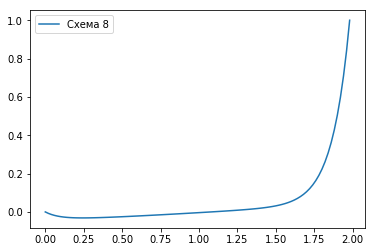

In [7]:
p1, = plt.plot(x, first_y)
plt.legend([p1], ['Схема 8'], loc=2)
plt.show()


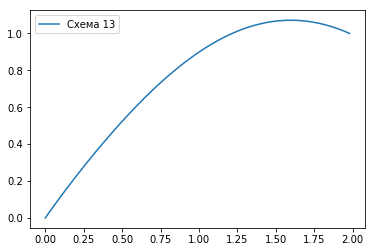

In [8]:
# pyplot.legend([p1, p2, p3, p4], ['first schema', 'second schema', 'third schema', 'analytic'], loc=2)

p2, = plt.plot(x, second_y)
plt.legend([p2], ['Схема 13'], loc=2)
plt.show()

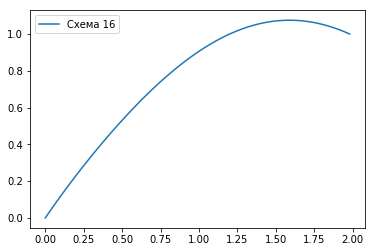

In [9]:
p3, = plt.plot(x, third_y)
plt.legend([p3], ['Схема 16'], loc=2)
plt.show()

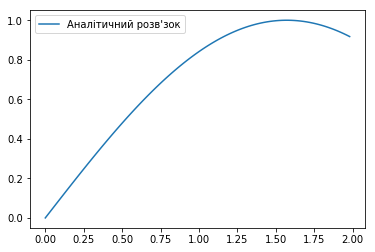

In [10]:
p4, = plt.plot(x, analytic)
plt.legend([p4], ["Аналітичний розв'зок"], loc=2)
plt.show()